In [ ]:

import pandas as pd
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
%matplotlib inline


In [ ]:
# Adjust connection string as needed
conn_str = (
    "DRIVER={ODBC Driver 17 for SQL Server};"
    "SERVER=localhost;"
    "DATABASE=local-retail-dwh;"
    "Trusted_Connection=yes;"
)
conn = pyodbc.connect(conn_str)


C:\Users\Besarta Kurtaj\AppData\Local\Temp\ipykernel_15408\2002038608.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


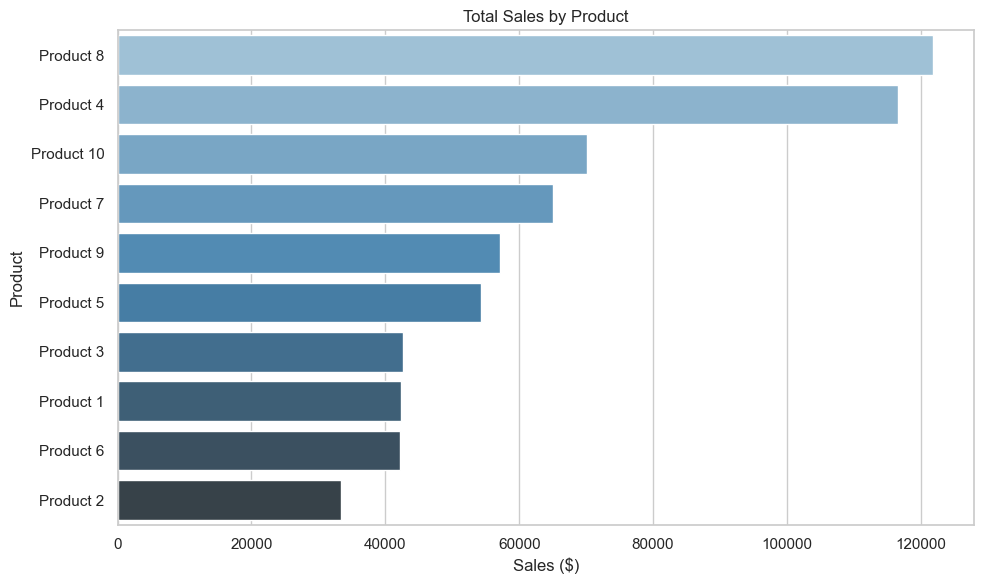

In [7]:
query = """
SELECT p.product_name, SUM(s.total_amount) AS total_sales
FROM fact_sales s
JOIN dim_product p ON s.product_id = p.product_id
GROUP BY p.product_name
ORDER BY total_sales DESC;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="total_sales", y="product_name", hue="product_name", palette="Blues_d", legend=False)
plt.title("Total Sales by Product")
plt.xlabel("Sales ($)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


C:\Users\Besarta Kurtaj\AppData\Local\Temp\ipykernel_15408\3845450824.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


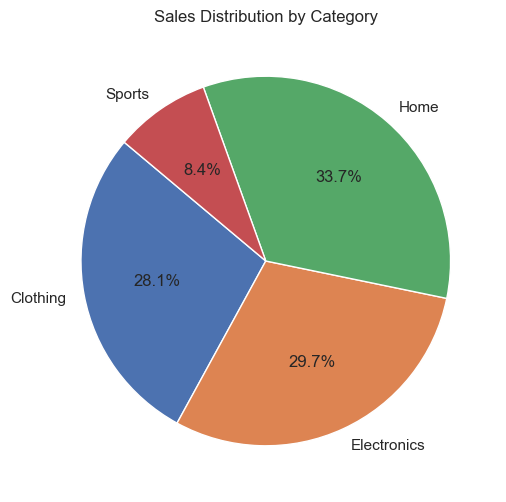

In [4]:
query = """
SELECT p.category, SUM(s.total_amount) AS total_sales
FROM fact_sales s
JOIN dim_product p ON s.product_id = p.product_id
GROUP BY p.category;
"""
df = pd.read_sql(query, conn)
plt.figure(figsize=(6, 6))
plt.pie(df['total_sales'], labels=df['category'], autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Category")
plt.show()


C:\Users\Besarta Kurtaj\AppData\Local\Temp\ipykernel_15408\2468709228.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\Besarta Kurtaj\AppData\Local\Temp\ipykernel_15408\2468709228.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="segment", y="total_sales", palette="pastel")


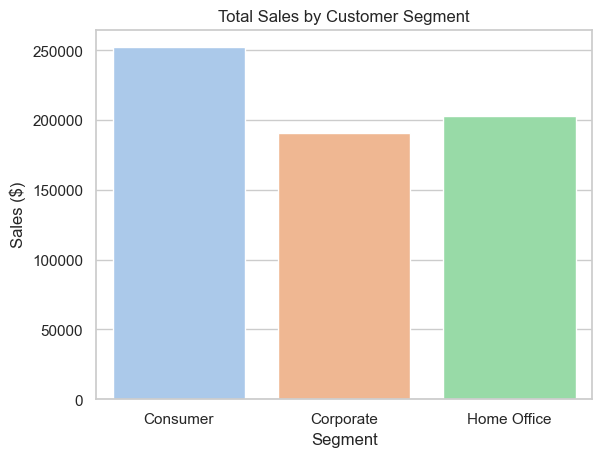

In [9]:
query = """
SELECT c.segment, SUM(s.total_amount) AS total_sales
FROM fact_sales s
JOIN dim_customer c ON s.customer_id = c.customer_id
GROUP BY c.segment;
"""
df = pd.read_sql(query, conn)
sns.barplot(data=df, x="segment", y="total_sales", palette="pastel")
plt.title("Total Sales by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Sales ($)")
plt.show()


C:\Users\Besarta Kurtaj\AppData\Local\Temp\ipykernel_15408\3776387632.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


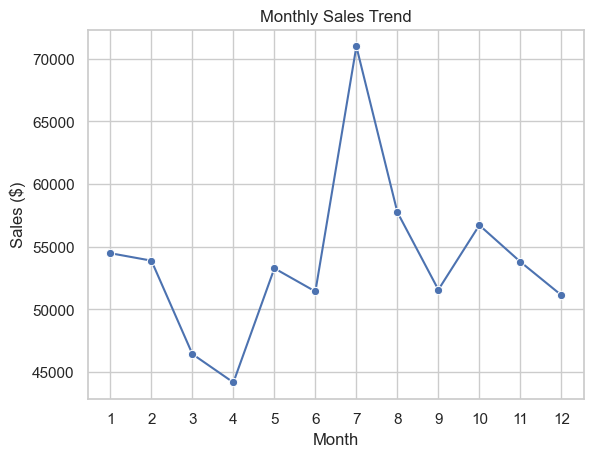

In [6]:
query = """
SELECT t.month, SUM(s.total_amount) AS total_sales
FROM fact_sales s
JOIN dim_time t ON s.time_id = t.time_id
GROUP BY t.month
ORDER BY t.month;
"""
df = pd.read_sql(query, conn)
sns.lineplot(data=df, x="month", y="total_sales", marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Sales ($)")
plt.xticks(range(1, 13))
plt.show()
